In [1]:
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt
from math import log, sqrt

In [2]:
# Helpful utility for drawing
max_curve_cnt = 7
def createHSVColor(indexCurve, maximumNumberOfCurves):
    """Create a HSV color for the indexCurve-th curve
    from a sample with maximum size equal to maximumNumberOfCurves"""
    color = ot.Drawable.ConvertFromHSV(
        indexCurve * 360.0 / maximumNumberOfCurves, 1.0, 1.0
    )
    return color

In [3]:
# Load the csv data
sample = ot.Sample.ImportFromCSVFile("WaveData_Example.csv",",")
# Select only the Height data
sample = sample[:,0]

In [4]:
# Demonstrate different fitting techniques using a log-normal
#############################################################

# Fit the data by method of moments
# Calculate m1 and m2 manually

m1 = sample.computeRawMoment(1)[0]
m2 = sample.computeRawMoment(2)[0]
mu = log(m1*m1/sqrt(m2))
sigma = sqrt(log(m2/(m1*m1)))
dist_mom = ot.LogNormal(mu,sigma,0.0)
print("Manual Method of Moments:",mu,sigma)

Manual Method of Moments: 1.1333148287687866 0.5199030378547786


In [5]:
# Use a fitting package to use the same moment method fitting
factory_mom_ln = ot.MethodOfMomentsFactory(ot.LogNormal())
# Set gamma to 0.0
factory_mom_ln.setKnownParameter([0.0],[2])
dist_mom_ln = factory_mom_ln.build(sample)
print(dist_mom_ln)

LogNormal(muLog = 1.14965, sigmaLog = 0.49647, gamma = 0)


In [6]:
# perform a maximum liklihood fit of the same data
factory_mle_ln = ot.MaximumLikelihoodFactory(ot.LogNormal())
# Set gamma to 0.0
factory_mle_ln.setKnownParameter([0.0],[2])
dist_mle_ln = factory_mle_ln.build(sample)
print(dist_mle_ln)

LogNormal(muLog = 1.12442, sigmaLog = 0.541791, gamma = 0)


In [7]:
# Demonstrate different fitting techniques using 2 param Weibuls
################################################################

# Use a package that gives a liklihood maximumization
factory_mle_wbl = ot.MaximumLikelihoodFactory(ot.WeibullMin())
# Set gamma to 0
factory_mle_wbl.setKnownParameter([0.0],[2])
# Give bounds for the optimization
lowerBound=[0.1, 0.5]
upperBound=[10.0, 3.0]
bounds = ot.Interval(lowerBound, upperBound, [True,True], [True,True])
factory_mle_wbl.setOptimizationBounds(bounds)
# Set the starting point for the optimization
solver = factory_mle_wbl.getOptimizationAlgorithm()
solver.setStartingPoint([5.0,2.0])
# solve the distribution
dist_mle_wbl = factory_mle_wbl.build(sample)
print(dist_mle_wbl)

WeibullMin(beta = 4.02957, alpha = 1.92335, gamma = 0)


In [8]:
# Fit the Weibul by matching quantiles at 0.75 and 0.99
# Extract target quantiles from the data
p1=0.75
p2=0.90
p3=0.99
q1 = sample.computeQuantile(p1)[0]
q2 = sample.computeQuantile(p2)[0]
q3 = sample.computeQuantile(p3)[0]
# Set bounds so that gamma is set to 0.0
lowerBound=[-100.0, -100.0, -0.000001]
upperBound=[100.0, 100.0, 0.000001]
bounds = ot.Interval(lowerBound, upperBound, [False,False,True], [False,False,True])
# build our factory
factory_qtl_wbl = ot.QuantileMatchingFactory(ot.WeibullMin(), [p1, p2, p3], bounds)
dist_qtl_wbl = factory_qtl_wbl.buildFromQuantiles([q1, q2, q3])
print(dist_qtl_wbl)

WeibullMin(beta = 3.53493, alpha = 1.45665, gamma = 1e-06)


In [9]:
# Demonstrate Gamma distribution
###################################################################

# Use a package that gives a liklihood maximumization
factory_mle_gam = ot.MaximumLikelihoodFactory(ot.Gamma())
# Set gamma to 0
factory_mle_gam.setKnownParameter([0.0],[2])
# Give bounds for the optimization
lowerBound=[0.1, 0.1]
upperBound=[10.0, 10.0]
bounds = ot.Interval(lowerBound, upperBound, [True,True], [True,True])
factory_mle_gam.setOptimizationBounds(bounds)
## solve the distribution
dist_mle_gam = factory_mle_gam.build(sample)
print(dist_mle_gam)

Gamma(k = 3.62946, lambda = 1.02083, gamma = 0)


In [10]:
# Use a package that gives a liklihood maximumization
factory_mle_wbl3 = ot.MaximumLikelihoodFactory(ot.WeibullMin())
# Give bounds for the optimization
# 3.5556343 1.7025580 0.3997116
lowerBound=[1.0, 1.0, -1.0]
upperBound=[5.0, 3.0, 1.0]
bounds = ot.Interval(lowerBound, upperBound, [True,True,True], [True,True,True])
factory_mle_wbl3.setOptimizationBounds(bounds)
# Set the starting point for the optimization
solver = factory_mle_wbl3.getOptimizationAlgorithm()
solver.setStartingPoint([4.0,2.0,0.0])
# solve the distribution
dist_mle_wbl3 = factory_mle_wbl3.build(sample)
print(dist_mle_wbl3)

WeibullMin(beta = 3.64635, alpha = 1.52392, gamma = 0.395226)


WRN - TNC went to an abnormal point x=[nan,nan,nan] y=[] msg=TNC got a nan input value


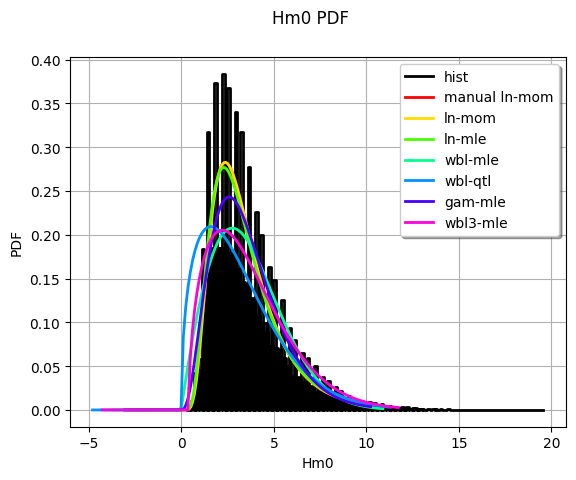

In [11]:
# Show the PDFs
###############

# Show a histogram of the data
graph = ot.HistogramFactory().build(sample).drawPDF()
graph.setColors(["black"])
graph.setLegends(["hist"])
# manual moment
graph_mom = dist_mom.drawPDF()
graph_mom.setLegends(["manual ln-mom"])
graph_mom.setColors([createHSVColor(0, max_curve_cnt)])
graph.add(graph_mom)
# Add to the graph
graph_mom_ln = dist_mom.drawPDF()
graph_mom_ln.setLegends(["ln-mom"])
graph_mom_ln.setColors([createHSVColor(1, max_curve_cnt)])
graph.add(graph_mom_ln)
# Add to the graph
graph_mle_ln = dist_mle_ln.drawPDF()
graph_mle_ln.setLegends(["ln-mle"])
graph_mle_ln.setColors([createHSVColor(2, max_curve_cnt)])
graph.add(graph_mle_ln)
# Add to the graph
graph_mle_wbl = dist_mle_wbl.drawPDF()
graph_mle_wbl.setLegends(["wbl-mle"])
graph_mle_wbl.setColors([createHSVColor(3, max_curve_cnt)])
graph.add(graph_mle_wbl)
# Add to the graph
graph_qtl_wbl = dist_qtl_wbl.drawPDF()
graph_qtl_wbl.setLegends(["wbl-qtl"])
graph_qtl_wbl.setColors([createHSVColor(4, max_curve_cnt)])
graph.add(graph_qtl_wbl)
# Add to the graph
graph_mle_gam = dist_mle_gam.drawPDF()
graph_mle_gam.setLegends(["gam-mle"])
graph_mle_gam.setColors([createHSVColor(5, max_curve_cnt)])
graph.add(graph_mle_gam)
# Add to the graph
graph_mle_wbl3 = dist_mle_wbl3.drawPDF()
graph_mle_wbl3.setLegends(["wbl3-mle"])
graph_mle_wbl3.setColors([createHSVColor(6, max_curve_cnt)])
graph.add(graph_mle_wbl3)
view = viewer.View(graph)
plt.show()

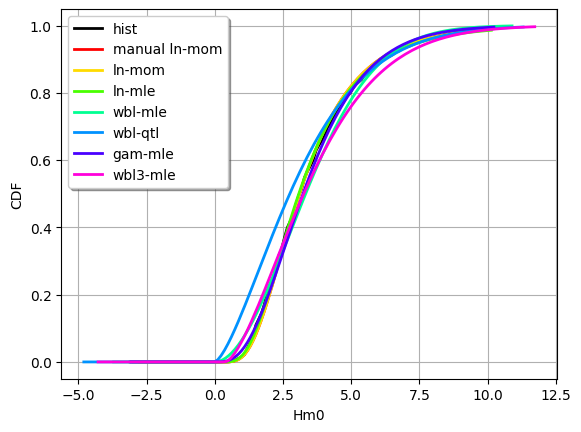

In [12]:
# Show the CDFs
###############

# Show a histogram of the data
graph = ot.HistogramFactory().build(sample).drawCDF()
graph.setColors(["black"])
graph.setLegends(["hist"])
# manual moment
graph_mom = dist_mom.drawCDF()
graph_mom.setLegends(["manual ln-mom"])
graph_mom.setColors([createHSVColor(0, max_curve_cnt)])
graph.add(graph_mom)
# Add to the graph
graph_mom_ln = dist_mom.drawCDF()
graph_mom_ln.setLegends(["ln-mom"])
graph_mom_ln.setColors([createHSVColor(1, max_curve_cnt)])
graph.add(graph_mom_ln)
# Add to the graph
graph_mle_ln = dist_mle_ln.drawCDF()
graph_mle_ln.setLegends(["ln-mle"])
graph_mle_ln.setColors([createHSVColor(2, max_curve_cnt)])
graph.add(graph_mle_ln)
# Add to the graph
graph_mle_wbl = dist_mle_wbl.drawCDF()
graph_mle_wbl.setLegends(["wbl-mle"])
graph_mle_wbl.setColors([createHSVColor(3, max_curve_cnt)])
graph.add(graph_mle_wbl)
# Add to the graph
graph_qtl_wbl = dist_qtl_wbl.drawCDF()
graph_qtl_wbl.setLegends(["wbl-qtl"])
graph_qtl_wbl.setColors([createHSVColor(4, max_curve_cnt)])
graph.add(graph_qtl_wbl)
# Add to the graph
graph_mle_gam = dist_mle_gam.drawCDF()
graph_mle_gam.setLegends(["gam-mle"])
graph_mle_gam.setColors([createHSVColor(5, max_curve_cnt)])
graph.add(graph_mle_gam)
# Add to the graph
graph_mle_wbl3 = dist_mle_wbl3.drawCDF()
graph_mle_wbl3.setLegends(["wbl3-mle"])
graph_mle_wbl3.setColors([createHSVColor(6, max_curve_cnt)])
graph.add(graph_mle_wbl3)
view = viewer.View(graph)
plt.show()

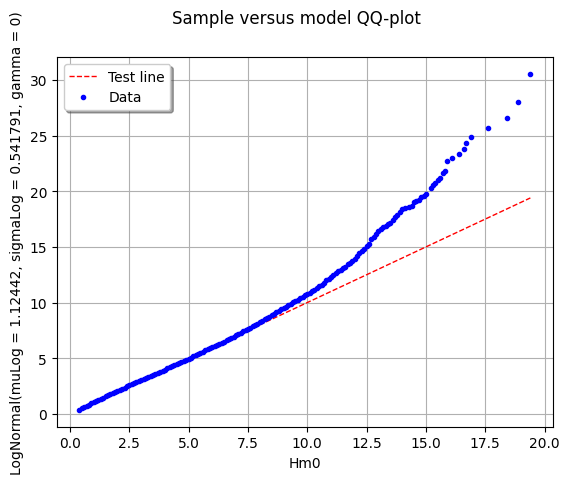

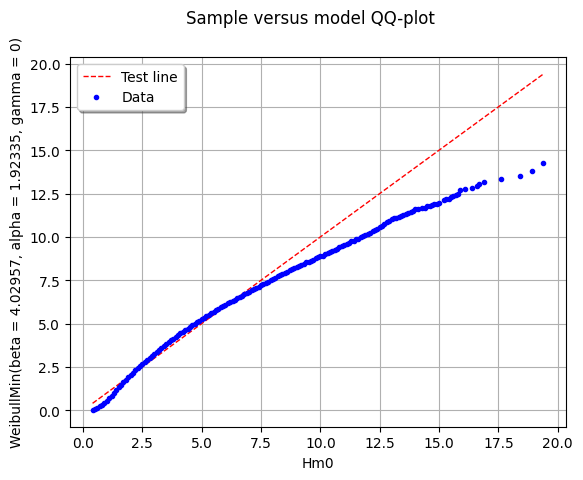

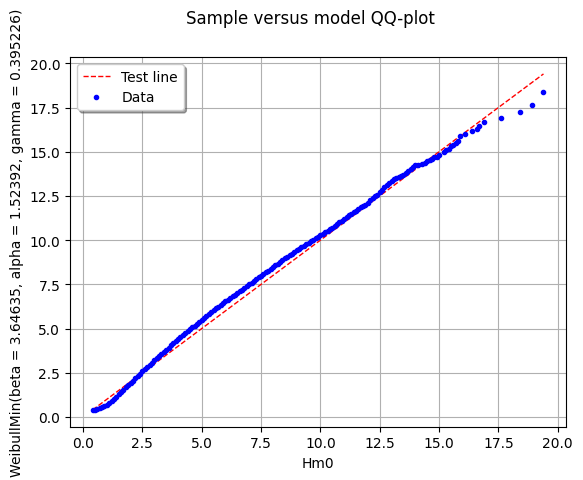

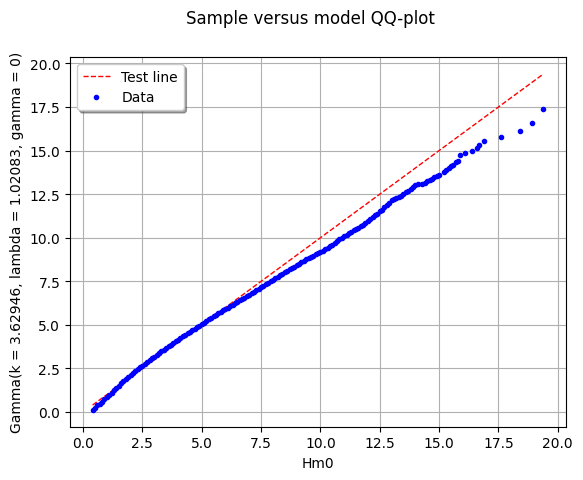

In [13]:
# Show some QQ plots
###################################################################

graph = ot.VisualTest.DrawQQplot(sample, dist_mle_ln)
view = viewer.View(graph)
plt.show()

graph = ot.VisualTest.DrawQQplot(sample, dist_mle_wbl)
view = viewer.View(graph)
plt.show()

graph = ot.VisualTest.DrawQQplot(sample, dist_mle_wbl3)
view = viewer.View(graph)
plt.show()

graph = ot.VisualTest.DrawQQplot(sample, dist_mle_gam)
view = viewer.View(graph)
plt.show()